# Boundary value problem

We will now return to solve the boundary value problem

$$
\frac{d^2u}{dx^2} = -\frac{\pi^2}{4} \left(u + 1\right)
$$

Here, we will have Dirichlet boundary conditions, as before, such that $u(0)=0$ and $u(1)=1$.

## Analytic solution

Recall from previous assignments that the analytic solution is

$$
u(x) = \cos\left(\frac{\pi}{2}x\right) + 2\sin\left(\frac{\pi}{2}x\right) -1
$$

## Shooting method


The first solution we will investigate here is a "shooting" method. We use a stepping ODE solver (in our case, RK4) to "shoot" the differential equation from one boundary to the other. We will then use a root-finding algorithm to find the value of $u(x=1)$. The algorithm will shoot above and below the root, and converge to the right answer at the boundaries.

Note, however, that the internal values will not necessarily be so accurately represented. 

In [1]:
%matplotlib widget

## Relaxation method


The next solution we will investigate here is a "relaxation" method. This is going to be very similar to PDE solvers later in the semester. We will start with an initial guess, and use Jacobi's algorithm to iterate until the difference between the computed second derivative stabilizes to a constant value. 

In this case, the internal values ARE accurately represented. 

In [2]:
import numpy as np
import scipy.integrate
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import display, Image, HTML
from bvp import *

### Set up functions

In [3]:
def simpleBVPFunc(u):
    return -np.pi**2 * (u+1)*0.25

def simpleBVP(x, state):
    u = state[0] ; uprime = state[1]
    du_dx = uprime
    duprime_dx = simpleBVPFunc(u)
    return [du_dx, duprime_dx]

def analytic(x):
    return -1. + np.cos(np.pi*0.5*x)+2.*np.sin(np.pi*0.5*x)

### Evaluate BVP

In [4]:
xbounds = np.array([0.,1.])
ubounds = np.array([0.,1.])
uprime = 3
bvpshoot = BVPShoot( simpleBVP, xbounds, ubounds, uprime )
%timeit -r 10 -n 10 bvpshoot.solve() # line timeit r: number of runs n: number of loops

2.53 ms ± 526 μs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [5]:
N = 100
bvprelax = BVPRelax( simpleBVPFunc, xbounds, ubounds, N)
eps = 1e-4

In [6]:
%%timeit -r 10 -n 100 # cell timeit r: number of runs n: number of loops
while bvprelax.change() > eps:
    bvprelax.relax()

The slowest run took 115.78 times longer than the fastest. This could mean that an intermediate result is being cached.
52.3 μs ± 142 μs per loop (mean ± std. dev. of 10 runs, 100 loops each)


## Plot solutions

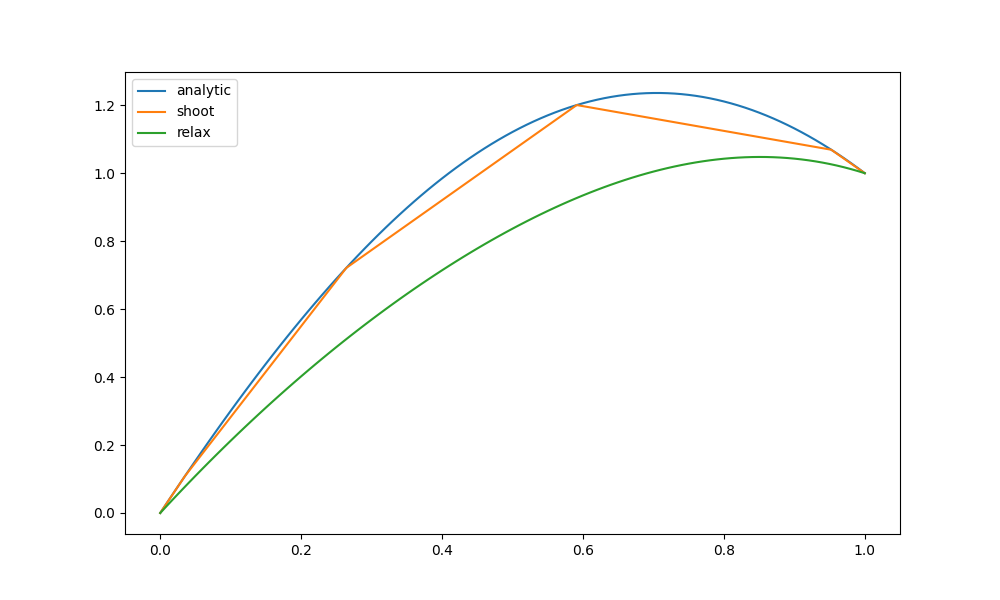

In [7]:
fig = plt.figure(1, figsize=(10,6))
xana = np.linspace(0,1,101)
uana = analytic(xana)
plt.plot(xana,uana, label="analytic")
plt.plot(bvpshoot.xvals, bvpshoot.uvals, label="shoot")
plt.plot(bvprelax.xvals, bvprelax.uvals, label="relax")
plt.legend()
plt.show()

In [ ]:
N = 100
bvprelax = BVPRelax( simpleBVPFunc, xbounds, ubounds, N)
eps = 1e-6

### Create Plot

In [ ]:
fig, ax = plt.subplots()
xana = np.linspace(0,1,101)
uana = analytic(xana)
ana  = plt.scatter( xana, uana, label='analytic')
plt.xlabel("x")
plt.ylabel("u(x)")
plt.ylim(0,2)
plt.show()

## Animate solutions

The relaxation method will only print every 1000th frame (!!!)

In [ ]:
class AnimatedBVP(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, xplot, yplot):
        self.xplot=xplot
        self.yplot=yplot
        self.i = 0
        self.stream = self.data_stream()
        self.nframes = len(xplot)
        self.data = None
        self.fig, self.ax = plt.subplots(figsize=(10, 6))
        xana = np.linspace(0,1,101)
        uana = analytic(xana)
        self.ax.plot( xana, uana, label='analytic')
        plt.xlabel("x")
        plt.ylabel("u(x)")
        plt.ylim(0,2)
        self.fig.show()
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=20,
                                           frames=self.nframes,
                                           init_func=self.setup_plot, blit=False)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x,y = next(self.stream)
        self.myplot = self.ax.plot(x, y)
        
        return self.myplot,

    def data_stream(self):
        while True:
            yield self.xplot[self.i], self.yplot[self.i]


    def update(self, i):
        """Update the scatter plot."""
        self.i = i
        self.data = next(self.stream)        

        # Set x and y data...
        self.myplot = self.ax.plot( self.data[0], self.data[1], label="iteration "+str(self.i))
        self.ax.legend()

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.myplot,

In [ ]:
anim1 = AnimatedBVP(xplot=bvpshoot.xplot, yplot=bvpshoot.uplot)
#HTML( anim1.ani.to_html5_video())

In [ ]:
anim2 = AnimatedBVP(xplot=bvprelax.xplot, yplot=bvprelax.uplot)
#HTML(anim2.ani.to_html5_video())